# Part-1

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Function to retrieve Column Headers in List
def Reading_Headers():
    f_col_headers=open('field_names.txt','r')
    col_headers=[]
    for i in f_col_headers.readlines():
        if i:
            i=i.strip("\n")
            col_headers.append(i)
    return col_headers

In [3]:
# Function for bootstrap samplings. only indexes are sampled, actual data is populated by the calling function
from sklearn.utils import resample
def bootstrap(index_data,sample_size):
    boot_data = resample(index_data, replace=True, n_samples=sample_size, random_state=1)
    oob_data = [x for x in index_data if x not in boot_data]
    return boot_data,oob_data

#### BootStrap function to draw the samples. Here logic is, I am redrawing the index number as the sample_size input and returning the sample_list which consists of the index numbers

In [4]:
import pandas as pd

#Collecting Column headers into a List
col_headers=Reading_Headers()

#Reading breast-cancer data and creating dataframe with respective column headers
df=pd.read_csv('breast-cancer.csv',names=col_headers) #Copy set
d=pd.read_csv('breast-cancer.csv',names=col_headers)

In [5]:
d.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
d.dtypes

ID                              int64
diagnosis                       int64
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [7]:
smooth_mean=d.groupby(['diagnosis'])['smoothness_mean'].mean()
smooth_median=d.groupby(['diagnosis'])['smoothness_mean'].median()
compact_mean=d.groupby(['diagnosis'])['compactness_mean'].mean()
compact_median=d.groupby(['diagnosis'])['compactness_mean'].median()
print('Smooth Mean={},Smooth Median={},compact Mean={},compact Median={}'.format(smooth_mean,smooth_median,compact_mean,compact_median))


Smooth Mean=diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64,Smooth Median=diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64,compact Mean=diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64,compact Median=diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64


##### Observation: Smoothness: Mean is larger than Median for both Malignant and Benign Cancers, which indicates data is right skewed

#### Observation: Compactness: Mean is slightly larger than Median for both Malignant and Benign Cancers, which indicates data is slightly right skewed

In [8]:
from scipy.stats import pearsonr
for i in d.columns:
    print(pearsonr(d[i],d['diagnosis'])[0],':Correlation Coefficient for feature',i,' and diagnosis')

0.03976850962171701 :Correlation Coefficient for feature ID  and diagnosis
1.0 :Correlation Coefficient for feature diagnosis  and diagnosis
0.7300285113754564 :Correlation Coefficient for feature radius_mean  and diagnosis
0.4151852998452044 :Correlation Coefficient for feature radius_sd_error  and diagnosis
0.7426355297258331 :Correlation Coefficient for feature radius_worst  and diagnosis
0.70898383658539 :Correlation Coefficient for feature texture_mean  and diagnosis
0.3585599650859321 :Correlation Coefficient for feature texture_sd_error  and diagnosis
0.5965336775082533 :Correlation Coefficient for feature texture_worst  and diagnosis
0.6963597071719058 :Correlation Coefficient for feature perimeter_mean  and diagnosis
0.7766138400204354 :Correlation Coefficient for feature perimeter_sd_error  and diagnosis
0.3304985542625471 :Correlation Coefficient for feature perimeter_worst  and diagnosis
-0.012837602698432378 :Correlation Coefficient for feature area_mean  and diagnosis
0.5

###### code to determine the correlation coef.

In [9]:
# Determining the Co-relation Coeficient between the features
from sklearn import preprocessing
standardized_data=pd.DataFrame()
for i in col_headers:
    standardized_data[i]=preprocessing.minmax_scale(d[i]) # Standarising the data 

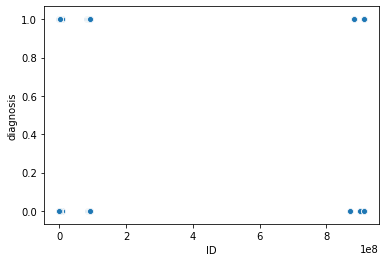

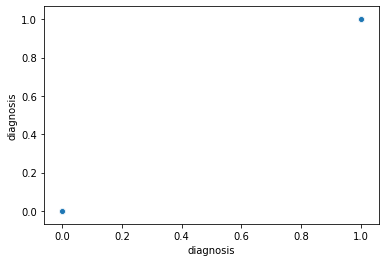

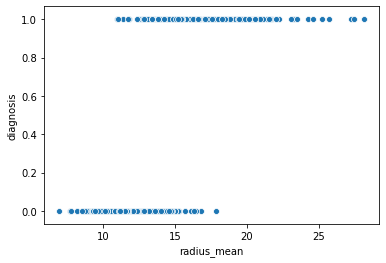

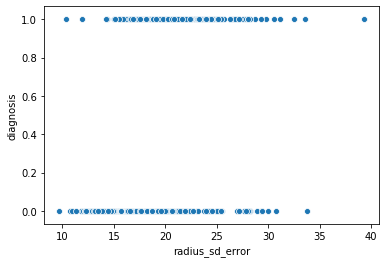

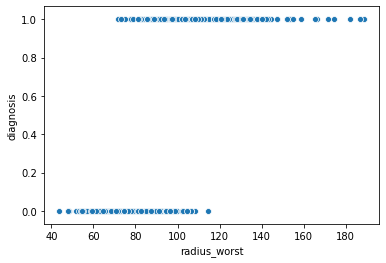

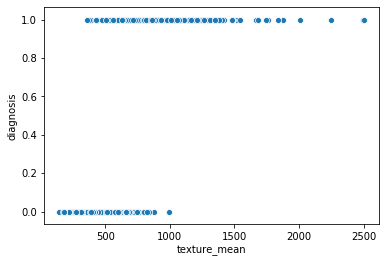

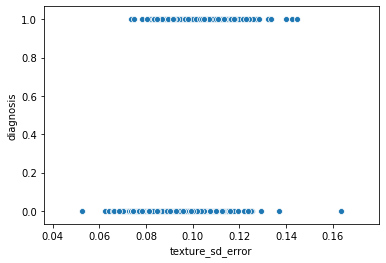

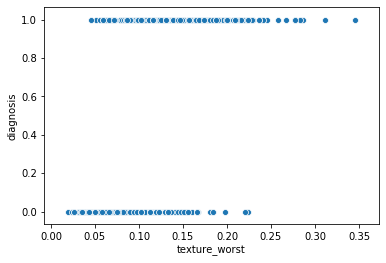

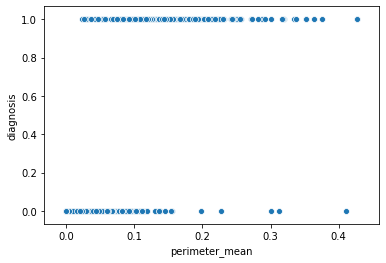

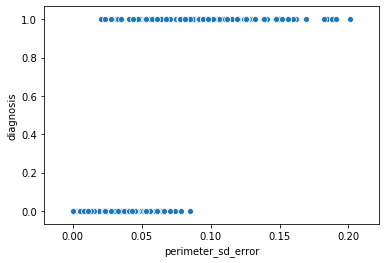

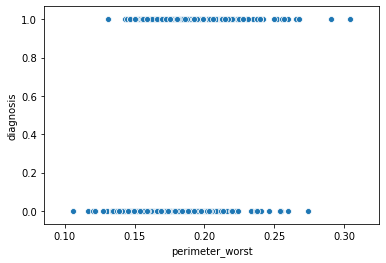

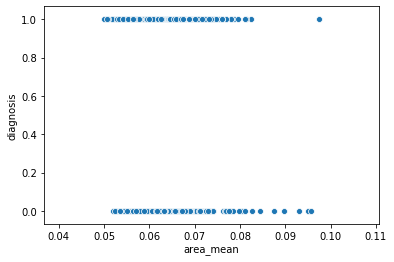

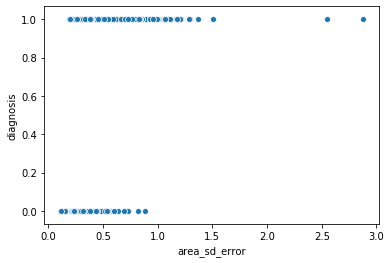

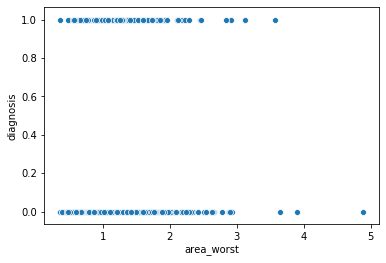

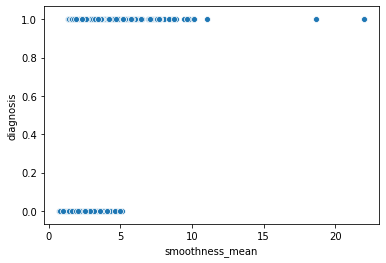

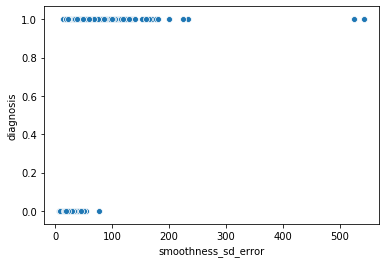

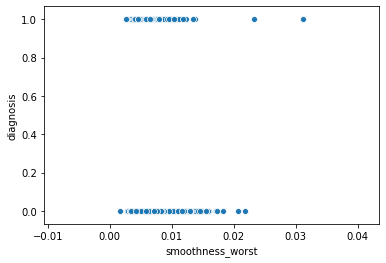

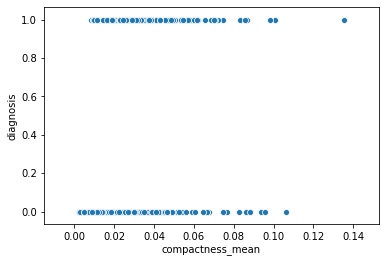

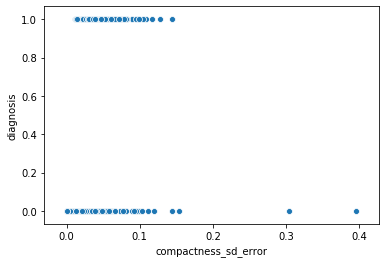

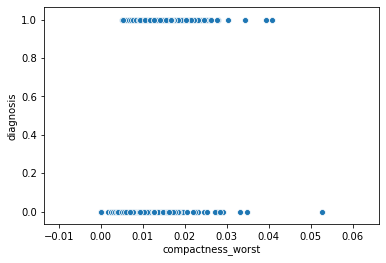

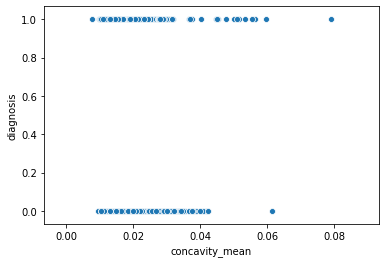

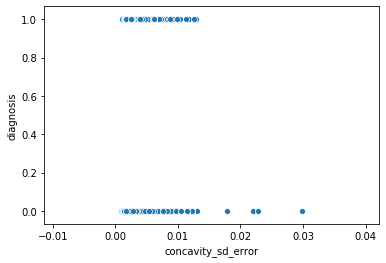

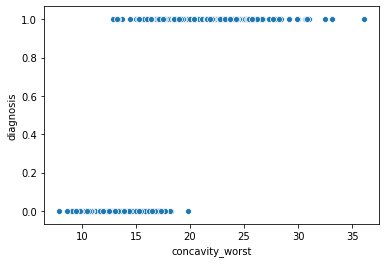

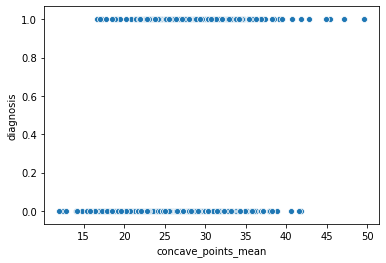

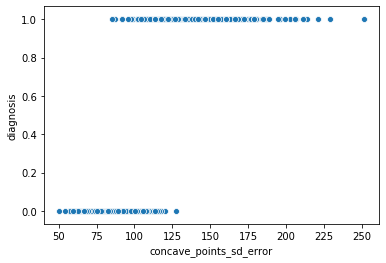

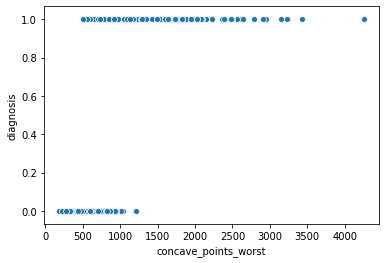

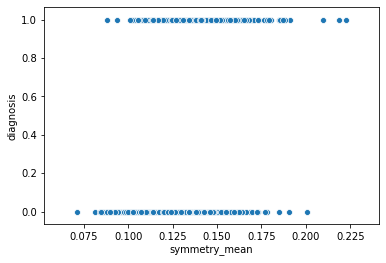

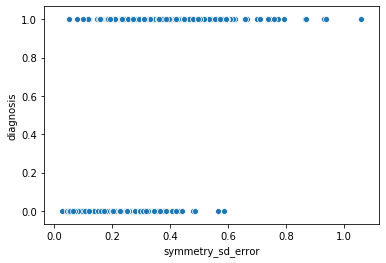

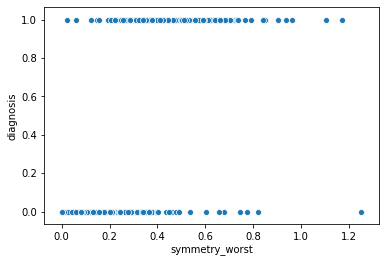

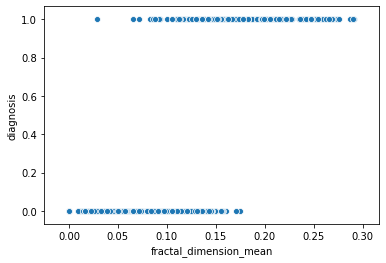

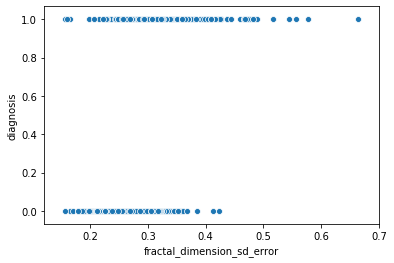

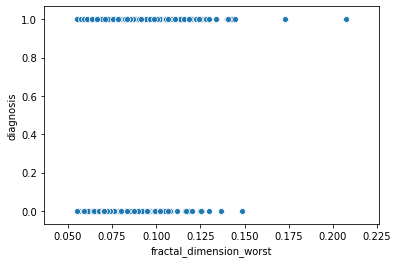

In [10]:
import seaborn as sns
%matplotlib inline
for i in col_headers:
    ax=sns.scatterplot(d[i],d['diagnosis'])
    ax.set(xlabel=i,ylabel='diagnosis')
    plt.show()

###### Visual representation of the features and diagnosis

Above scatter plot clearly indicating that as the value of feature is increasing there is a clear inclination to diagnosis value to be 1, which is intern representation for Cancer to Malignant.

In [11]:
from sklearn.model_selection import train_test_split
# sampling 1000 using bootstrap; functions will return index in the sample and out of sample
# In sample are collection as train_index and used as training set, other which are out of sample are used as test set
train_index,test_index=bootstrap(d.index,1000) 

# Creating two empty dataframes
train_bootstraped_data=pd.DataFrame(columns=col_headers)
test_bootstraped_data=pd.DataFrame(columns=col_headers)

#filling the dataframe with actual data based on the indexes retrieved from the Bootstrap Function
j=0
for i in train_index:
    train_bootstraped_data.loc[j]=(d.iloc[i])
    j+=1
j=0
for i in test_index:
    test_bootstraped_data.loc[j]=(d.iloc[i])
    j+=1
    
# Creating the labels for both train and test data
y_train=pd.DataFrame(train_bootstraped_data['diagnosis']) 
y_test=pd.DataFrame(test_bootstraped_data['diagnosis'])

# droping the diagnosis and ID column from the dataframe
train_bootstraped_data.drop(['diagnosis'],axis=1,inplace=True)
train_bootstraped_data.drop(['ID'],axis=1,inplace=True)
test_bootstraped_data.drop(['diagnosis'],axis=1,inplace=True)
test_bootstraped_data.drop(['ID'],axis=1,inplace=True)

# Model Construction

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#Model Creation
clf=SVC(kernel='linear')

#Model Training
clf.fit(train_bootstraped_data,y_train)

#Model Evaluation
y_pred = clf.predict(test_bootstraped_data)

#Print Performance Metrics
print('Train set Score:',clf.score(train_bootstraped_data,y_train))
print('Test set Score:',clf.score(test_bootstraped_data,y_test))
print('Mean absolute Error on Test data:',metrics.mean_absolute_error(y_test,y_pred))
scores=cross_val_score(clf,test_bootstraped_data,y_test,cv=5)
print(scores.mean())

C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set Score: 0.97
Test set Score: 0.9523809523809523
Mean absolute Error on Test data: 0.047619047619047616


C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when 

0.9279411764705883


C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Here I am using Support VectorClassifier algorithm as it very effective in classifing the binary classification. With this model  training data score is over 97%, test data score is 95% and mean absolute error is 0.047. Even Cross validation score is good which is 92.79%

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Model Creation
clf_RF=RandomForestClassifier(n_estimators=25)

#Model Training
clf_RF.fit(train_bootstraped_data,y_train)

#Model Prediction
y_pred = clf_RF.predict(test_bootstraped_data)

#Performance Metrics
print('Train set Score:',clf_RF.score(train_bootstraped_data,y_train))
print('Test set Score:',clf_RF.score(test_bootstraped_data,y_test))
print('Mean absolute Error on Test data:',metrics.mean_absolute_error(y_test,y_pred))
scores=cross_val_score(clf_RF,test_bootstraped_data,y_test,cv=5)
print(scores.mean())

C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A 

Train set Score: 1.0
Test set Score: 0.9523809523809523
Mean absolute Error on Test data: 0.047619047619047616
0.9286764705882353


###### Here I am using Random Forest Classifier algorithm. With this model  training data score is 100% test data score is over 94% and mean absolute error is 0.059. Cross validation score is 92.86

#### Comparison between two models:
####SVM: This algo with work good with binary classification, and become complex with multi classification
#### RandomForest: Works very fine, it uses the ensemble technique

#### Performance:
#### Support VectorClassifier algorithm as it very effective in classifing the binary classification. With this model  training data score is over 97%, test data score is 95% and mean absolute error is 0.047.
#### Random Forest Classifier algorithm. With this model  training data score is 100% test data score is over 94% and mean absolute error is 0.059


# Part - 2

## Student 1 code

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression #Comment: LinearRegression class should be derived from sklearn.linearmodel
from sklearn.cross_validation import cross_val_score # comment: NO cross_validation class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection

# Load data
d = pd.read_csv('../data/train.csv')

# Setup data for prediction
x1 = d.SalaryNormalized # it is not data but it is d
x2 = pd.get_dummies(d.ContractType) # it is not data but it is d

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score # comment:NO cross_validation class directly is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection
from sklearn.cross_validation import train_test_split # comment:NO train_test_split directly class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') # scoring does not take 'mean_absolute_error' parameter
print(scores.mean())

## Most of the comments are given inline. 
## Following observation are made:
### 1. No exploratory data analysis is done
### 2. Trying to predict only using one model...which may not be correct
### 3. No model training is carried out
### 4. Model fitting is not done
### 5. Not able to understand why student is finding the scores of Salary and ContractType
### 6. Student not tried to explore categorical data at all...by which be will be leaving out most of the information
### 7. Many compile time errors are there in the code

# It can be judged that student have not got the conceptual clarity on what he has to do analysis because he tring to identify relationship between salary and ContractType. Here ContractType is filled with dummies. So he tring to identifying relationship with dummies

# Student 2 code review 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score # comment: NO cross_validation class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error') # scoring does not take 'mean_absolute_error' parameter
print(scores.mean())

## Most of the comments are given inline. 
## Following observation are made:
### 1. No exploratory data analysis is done
### 2. Trying to predict only using one model...which may not be correct
### 3. No model training is carried out
### 4. Model fitting is not done
### 5. Not able to understand why student is finding the scores of Salary and ContractType
### 6. Student not tried to explore categorical data at all...by which be will be leaving out most of the information
### 7. compile time errors are there in the code

# It can be judged that student have not got the conceptual clarity on what he has to do analysis because they were tring to identify relationship between salary and ContractType. Here ContractType is filled with dummies. So he tring to identifying relationship with dummies